## Mid Term Test - Text Based Analysis
## Text Analytics, Social Media Scrapping
### Abhinash Palagani, 0932692


#### Data Collection from the web
Data can be collected using APIs, typically for social media 

Data can be “Scrapped” from any website (using scrapy andRegularexpressions

## Authentication

In [522]:
#!pip install praw

In [523]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="0Tf4xnylq6T_ODVfxQ4PGQ",
    client_secret="Y8aJ9S10hjSP58PiHAl15hJqI16j3g",
    user_agent=user_agent
)

In [524]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"Diabetes"** subreddit channel will be use for this project

In [526]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("diabetes").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

2023 Community feedback loop results
13qfej4
cascer1
1684916090.0
29
0.91
https://www.reddit.com/r/diabetes/comments/13qfej4/2023_community_feedback_loop_results/
0


**Get total comment in Subreddit**

In [528]:
headlines = set()
for submission in reddit.subreddit("diabetes").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

988


## Creating Diabetes Dataframe

In [530]:
df = pd.DataFrame(headlines)
df.head()

,0
0,"For the first time ever, I'm under control!"
1,Victoza
2,newly diagnosed
3,Anyone else
4,Any tips for getting around a difficult insura...


## Displaying Rows of a Dataframe

In [532]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Cancer DataFrame
df.head()

,0
0,"For the first time ever, I'm under control!"
1,Victoza
2,newly diagnosed
3,Anyone else
4,Any tips for getting around a difficult insura...


## Displaying the columns

In [534]:
# Display the column names of the Cancer DataFrame
df.columns

RangeIndex(start=0, stop=1, step=1)

## Renaming the column of the Diabetes Dataframe

In [536]:
# Renaming the column of the Cancer DataFrame to 'Titles' and displaying the first few rows
df.columns = ['Titles']
df.head()

,Titles
0,"For the first time ever, I'm under control!"
1,Victoza
2,newly diagnosed
3,Anyone else
4,Any tips for getting around a difficult insura...


## Datatypes of the Diabetes dataset

In [538]:
# df.dtypes returns data types of the data frame
df.dtypes

Titles    object
dtype: object

## Display information

In [540]:
#df.info returns concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titles  988 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


## Display Descriptive

In [542]:
#The df.describe() method in pandas is used to generate descriptive statistics of the central tendency, dispersion, and shape of a DataFrame's distribution, excluding NaN values
df.describe()

,Titles
count,988
unique,988
top,"For the first time ever, I'm under control!"
freq,1


## Adding a new columb to the dataframe 

In [544]:
#Let’s add a new column with the length of the “text” column
#df['text']: Selects the 'text' column from the DataFrame.
#.str.len(): Applies the len() function to each element in the 'text' column, returning the length of each string.
#df['length'] = ...: Creates a new column named 'length' in the DataFrame and assigns the calculated lengths to this column

df['length'] = df['Titles'].str.len()
df.describe()

,length
count,988.000000
mean,39.405870
std,29.389331
min,4.000000
25%,21.000000
50%,32.000000
75%,49.000000
max,295.000000


## Display Dataframe Information

In [546]:
#The df.describe(include='O') output will show statistics for each object (string) column in your DataFrame.
df.describe(include='O')

,Titles
count,988
unique,988
top,"For the first time ever, I'm under control!"
freq,1


## Checking for duplicate titles in the Diabetes DataFrame

In [548]:
df.Titles.duplicated().sum() 

0

## Finding a missing values of Dataframe

In [550]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
df.isna().sum()

Titles    0
length    0
dtype: int64

## Changing Titles to Uppercase

In [552]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'Titles' column to uppercase.


df['Titles'] = df['Titles'].str.upper()
print (df)

                                                Titles  length
0         FOR THE FIRST TIME EVER, I'M UNDER CONTROL!       44
1                                              VICTOZA       7
2                                      NEWLY DIAGNOSED      15
3                                          ANYONE ELSE      11
4    ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...      59
..                                                 ...     ...
983               WEIGHT WATCHERS AND FREESTYLE LIBRE?      36
984                       INSULIN SHOT IS NOT WORKING       28
985   THESE BOYS DIDN’T MAKE MY CGM GO OFF THE CHARTS?      48
986  I THINK MY UNCONTROLLED DIABETES HAS CAUSED ME...      70
987  GETTING THERE.  FEET ARE IN BAD SHAPE RIGHT NO...     295

[988 rows x 2 columns]


## Cleaning the text

In [554]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text
df.head()

,Titles,length
0,"FOR THE FIRST TIME EVER, I'M UNDER CONTROL!",44
1,VICTOZA,7
2,NEWLY DIAGNOSED,15
3,ANYONE ELSE,11
4,ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...,59


## Removing Emoji and Unique 

In [556]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles,length
0,"FOR THE FIRST TIME EVER, I'M UNDER CONTROL!",44
1,VICTOZA,7
2,NEWLY DIAGNOSED,15
3,ANYONE ELSE,11
4,ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...,59


### Plotting charts

Text(0.5, 1.0, 'Line Plot of Length Column')

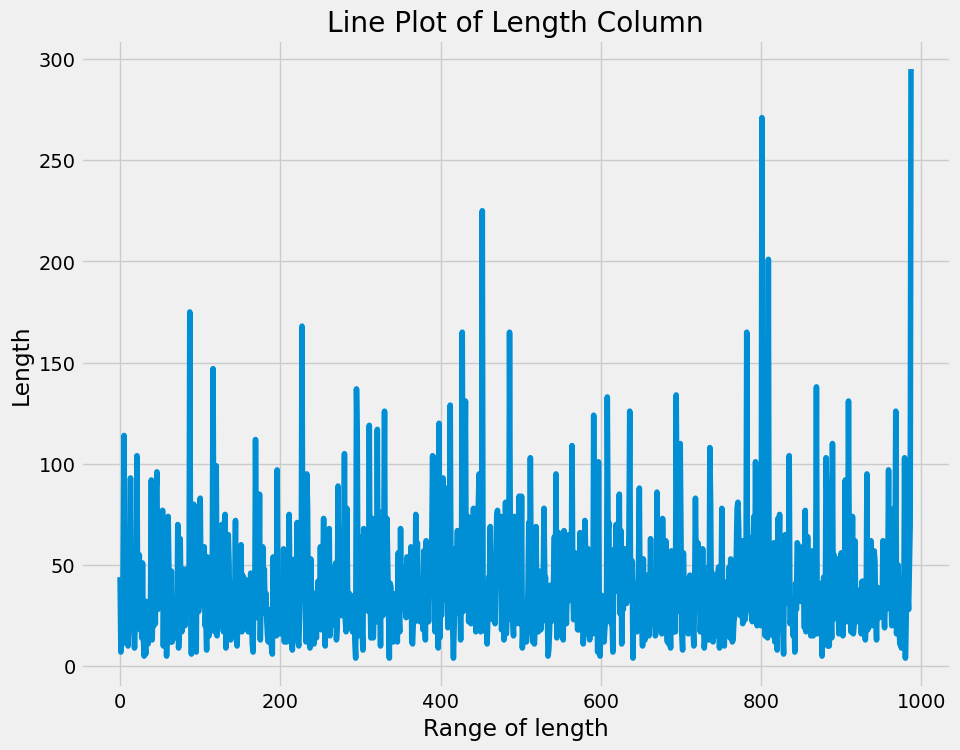

In [558]:
#df['length'].plot(): This creates a line plot for the 'length' column. The x-axis will likely represent the index of the DataFrame, and the y-axis will represent the values in the 'length' column.
#df['length'].plot(kind='box', vert=False): This creates a horizontal box plot for the 'length' column. Box plots provide a visual summary of the distribution of data, including the median, quartiles, and potential outliers.

#!pip install matplotlib

import matplotlib.pyplot as plt
df['length'].plot()
plt.xlabel('Range of length') 
plt.ylabel('Length')
plt.title('Line Plot of Length Column') 

### Boxplot

Text(0.5, 1.0, 'Box Plot of Length Column')

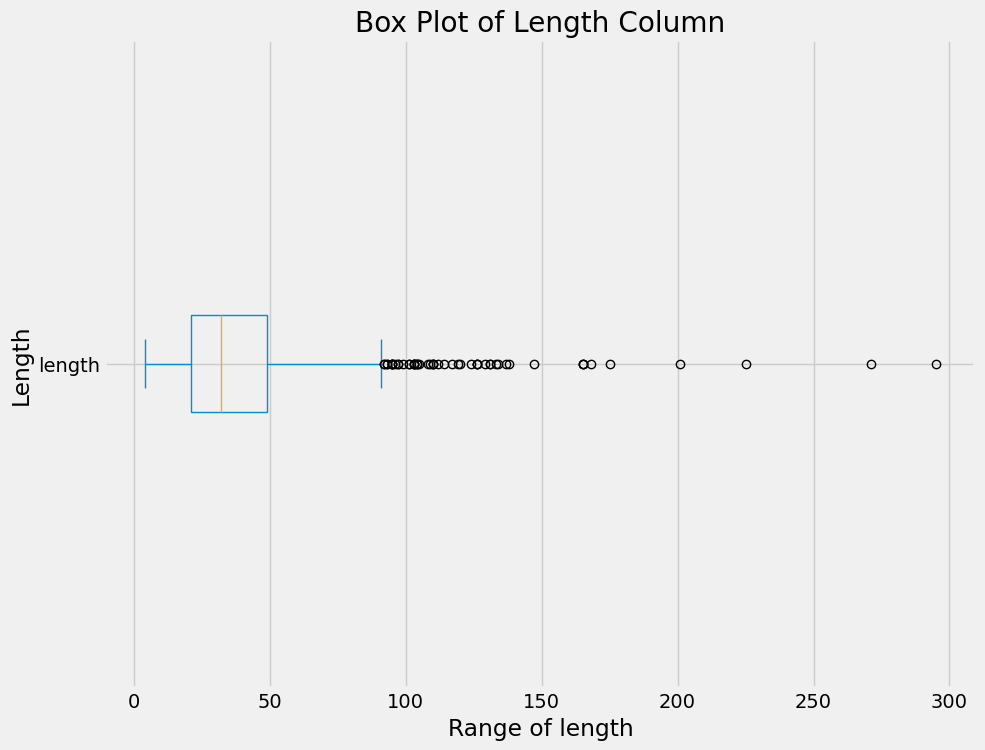

In [560]:
df['length'].plot(kind='box', vert=False)
plt.xlabel('Range of length')
plt.ylabel('Length') 
plt.title('Box Plot of Length Column') 

### Histogram

Text(0.5, 1.0, 'Histogram of Length Column')

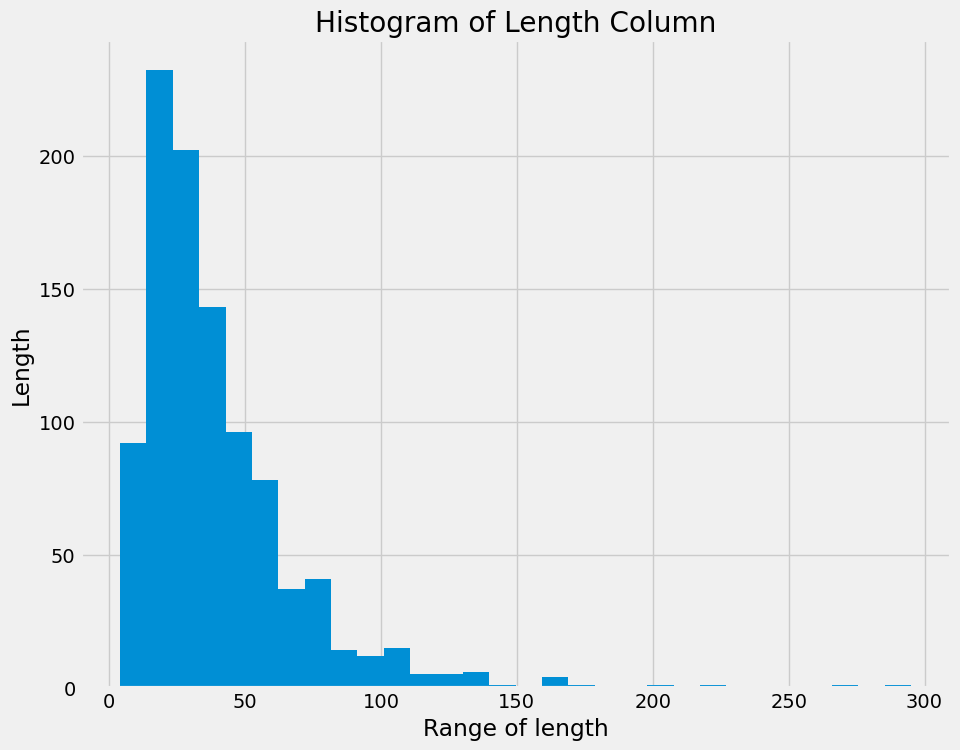

In [562]:
#df['length'].plot(kind='hist', bins=30): This creates a histogram for the 'length' column with 30 bins. The x-axis represents the range of 'length' values, and the y-axis represents the frequency or count of values within each bin.

df['length'].plot(kind='hist', bins=30)
plt.xlabel('Range of length')  
plt.ylabel('Length')  
plt.title('Histogram of Length Column') 

### REGEX TO PULL OUT WORDS

In [564]:
#!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


df['tokenized_Titles'] = df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0       FOR THE FIRST TIME EVER, I'M UNDER CONTROL!    
1                                            VICTOZA   
2                                    NEWLY DIAGNOSED   
3                                        ANYONE ELSE   
4  ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...   

                                    tokenized_Titles  
0  [FOR, THE, FIRST, TIME, EVER, I, M, UNDER, CON...  
1                                          [VICTOZA]  
2                                 [NEWLY, DIAGNOSED]  
3                                     [ANYONE, ELSE]  
4  [ANY, TIPS, FOR, GETTING, AROUND, A, DIFFICULT...  


## Remove Stop words

In [566]:
import nltk

# Download the necessary NLTK resources
#nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]



# Tokenize and remove stop words
df['clean_tokens'] = df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/b37e750d-630d-4bcf-a122-
[nltk_data]     bb3a4a582eb9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
983               WEIGHT WATCHERS AND FREESTYLE LIBRE?   
984                       INSULIN SHOT IS NOT WORKING    
985   THESE BOYS DIDN’T MAKE MY CGM GO OFF THE CHARTS?   
986  I THINK MY UNCONTROLLED DIABETES HAS CAUSED ME...   
987  GETTING THERE.  FEET ARE IN BAD SHAPE RIGHT NO...   

                                          clean_tokens  
983            [WEIGHT, WATCHERS, FREESTYLE, LIBRE, ?]  
984                           [INSULIN, SHOT, WORKING]  
985                [BOYS, ’, MAKE, CGM, GO, CHARTS, ?]  
986  [THINK, UNCONTROLLED, DIABETES, CAUSED, LOSE, ...  
987  [GETTING, ., FEET, BAD, SHAPE, RIGHT, ,, DIET,...  


## Function to tokenize

In [568]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
df['tokenized_Titles'] = df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0       FOR THE FIRST TIME EVER, I'M UNDER CONTROL!    
1                                            VICTOZA   
2                                    NEWLY DIAGNOSED   
3                                        ANYONE ELSE   
4  ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...   

                                    tokenized_Titles  
0  [FOR, THE, FIRST, TIME, EVER, I, M, UNDER, CON...  
1                                          [VICTOZA]  
2                                 [NEWLY, DIAGNOSED]  
3                                     [ANYONE, ELSE]  
4  [ANY, TIPS, FOR, GETTING, AROUND, A, DIFFICULT...  


## Stopwords from Dataset

In [570]:
#!pip install nltk

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Display the DataFrame
print(df.head()) 

{"isn't", 'won', "hadn't", 'ours', 'more', 'does', 'just', 'been', 'doing', "it's", 've', 'mightn', "wouldn't", 'again', "you'd", 'into', 'hers', "aren't", 'being', "don't", 'from', 'too', 'did', 'me', "that'll", "shouldn't", 'had', 'than', 'because', 'on', 's', 'hasn', "shan't", 'we', 'now', 'has', "haven't", "should've", 'ourselves', 'should', 'o', "couldn't", 'which', 'a', 'during', 'why', 'how', 'further', 'them', 'own', 'not', 'have', 'doesn', 'needn', 'weren', 'between', 'these', 'for', 'yourself', "weren't", 'itself', 'herself', 'at', 'no', "needn't", "you're", 'when', 'be', 'below', 'against', 'out', 'as', 'was', 'nor', 'under', 'her', 'she', 'hadn', 'down', 'he', 'of', "hasn't", 'only', 'this', 'such', 'then', "wasn't", 't', 'up', 'over', "she's", 'am', 'what', 'so', 'wouldn', 'in', 'until', 'an', 'm', 'ain', 'once', 'here', "mustn't", 'their', 'there', 'aren', 'your', 'other', 'shouldn', "didn't", 'it', 'his', 'will', 'yours', 'didn', 'isn', 'any', 'i', 'off', 'is', 'through'

## Removing Stopwords

In [572]:
#function to remove stop words
import pandas as pd
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
df['cleantokens'] = df['Titles'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(df[['Titles', 'cleantokens']].tail())

                                                Titles  \
983               WEIGHT WATCHERS AND FREESTYLE LIBRE?   
984                       INSULIN SHOT IS NOT WORKING    
985   THESE BOYS DIDN’T MAKE MY CGM GO OFF THE CHARTS?   
986  I THINK MY UNCONTROLLED DIABETES HAS CAUSED ME...   
987  GETTING THERE.  FEET ARE IN BAD SHAPE RIGHT NO...   

                                           cleantokens  
983              [WEIGHT, WATCHERS, FREESTYLE, LIBRE?]  
984                           [INSULIN, SHOT, WORKING]  
985             [BOYS, DIDN’T, MAKE, CGM, GO, CHARTS?]  
986  [THINK, UNCONTROLLED, DIABETES, CAUSED, LOSE, ...  
987  [GETTING, THERE., FEET, BAD, SHAPE, RIGHT, NOW...  


##  Pipeline

In [574]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


df['processed_Titles'] = df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(df[['Titles', 'processed_Titles']].tail())

                                                Titles  \
983               WEIGHT WATCHERS AND FREESTYLE LIBRE?   
984                       INSULIN SHOT IS NOT WORKING    
985   THESE BOYS DIDN’T MAKE MY CGM GO OFF THE CHARTS?   
986  I THINK MY UNCONTROLLED DIABETES HAS CAUSED ME...   
987  GETTING THERE.  FEET ARE IN BAD SHAPE RIGHT NO...   

                                      processed_Titles  
983               [weight, watchers, freestyle, libre]  
984                           [insulin, shot, working]  
985                      [boys, make, cgm, go, charts]  
986  [think, uncontrolled, diabetes, caused, lose, ...  
987  [getting, feet, bad, shape, right, diet, cycli...  


## Run the Pipeline

In [576]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


df['tokens'] = df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(df[['Titles', 'tokens']].head())


                                              Titles  \
0       FOR THE FIRST TIME EVER, I'M UNDER CONTROL!    
1                                            VICTOZA   
2                                    NEWLY DIAGNOSED   
3                                        ANYONE ELSE   
4  ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...   

                                              tokens  
0                       [first, time, ever, control]  
1                                          [victoza]  
2                                 [newly, diagnosed]  
3                                     [anyone, else]  
4  [tips, getting, around, difficult, insurance, ...  


## Counting the Tokens

In [578]:
#count the tokens
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens
983,WEIGHT WATCHERS AND FREESTYLE LIBRE?,36,"[WEIGHT, WATCHERS, AND, FREESTYLE, LIBRE]","[WEIGHT, WATCHERS, FREESTYLE, LIBRE, ?]","[WEIGHT, WATCHERS, FREESTYLE, LIBRE?]","[weight, watchers, freestyle, libre]","[weight, watchers, freestyle, libre]",4
984,INSULIN SHOT IS NOT WORKING,28,"[INSULIN, SHOT, IS, NOT, WORKING]","[INSULIN, SHOT, WORKING]","[INSULIN, SHOT, WORKING]","[insulin, shot, working]","[insulin, shot, working]",3
985,THESE BOYS DIDN’T MAKE MY CGM GO OFF THE CHARTS?,48,"[THESE, BOYS, DIDN, T, MAKE, MY, CGM, GO, OFF,...","[BOYS, ’, MAKE, CGM, GO, CHARTS, ?]","[BOYS, DIDN’T, MAKE, CGM, GO, CHARTS?]","[boys, make, cgm, go, charts]","[boys, make, cgm, go, charts]",5
986,I THINK MY UNCONTROLLED DIABETES HAS CAUSED ME...,70,"[I, THINK, MY, UNCONTROLLED, DIABETES, HAS, CA...","[THINK, UNCONTROLLED, DIABETES, CAUSED, LOSE, ...","[THINK, UNCONTROLLED, DIABETES, CAUSED, LOSE, ...","[think, uncontrolled, diabetes, caused, lose, ...","[think, uncontrolled, diabetes, caused, lose, ...",8
987,GETTING THERE. FEET ARE IN BAD SHAPE RIGHT NO...,295,"[GETTING, THERE, FEET, ARE, IN, BAD, SHAPE, RI...","[GETTING, ., FEET, BAD, SHAPE, RIGHT, ,, DIET,...","[GETTING, THERE., FEET, BAD, SHAPE, RIGHT, NOW...","[getting, feet, bad, shape, right, diet, cycli...","[getting, feet, bad, shape, right, diet, cycli...",32


### Word Frequency Analysis

In [580]:
#Let’s count
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('diabetes', 79), ('insulin', 67), ('sugar', 61), ('blood', 46), ('diabetic', 43)]


## Frequency of Dataframe words

In [582]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
print(freq_df)

         freq
token        
first      20
time       21
ever       12
control     6
victoza     1
...       ...
312         1
january     1
95          1
lbs         1
goal        1

[1761 rows x 1 columns]


## Sort and Display

In [584]:
#Lets sort and display

freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(15)

,freq
token,
diabetes,79
insulin,67
sugar,61
blood,46
diabetic,43
type,42
2,36
diagnosed,36
anyone,33


## Finding Information of Frequency

In [586]:
freq_df.describe()

,freq
count,1761.000000
mean,2.450312
std,4.710838
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,79.000000


## Bar chat

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

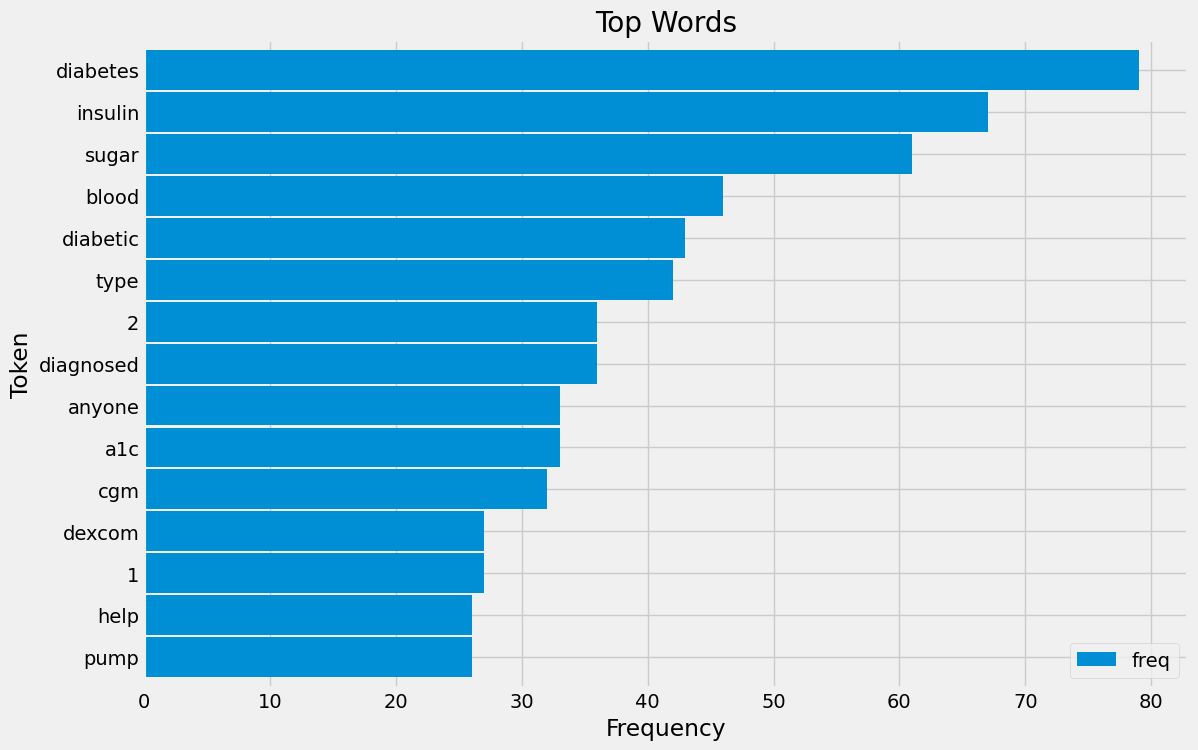

In [588]:
#Bar chart 

ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Sentiment Analysis Of Diabetes

In [590]:
#!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity
0,"FOR THE FIRST TIME EVER, I'M UNDER CONTROL!",44,"[FOR, THE, FIRST, TIME, EVER, I, M, UNDER, CON...","[FIRST, TIME, EVER, ,, 'M, CONTROL, !]","[FIRST, TIME, EVER,, I'M, CONTROL!]","[first, time, ever, control]","[first, time, ever, control]",4,0.333333,0.312500
1,VICTOZA,7,[VICTOZA],[VICTOZA],[VICTOZA],[victoza],[victoza],1,0.000000,0.000000
2,NEWLY DIAGNOSED,15,"[NEWLY, DIAGNOSED]","[NEWLY, DIAGNOSED]","[NEWLY, DIAGNOSED]","[newly, diagnosed]","[newly, diagnosed]",2,0.454545,0.136364
3,ANYONE ELSE,11,"[ANYONE, ELSE]","[ANYONE, ELSE]","[ANYONE, ELSE]","[anyone, else]","[anyone, else]",2,0.000000,0.000000
4,ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...,59,"[ANY, TIPS, FOR, GETTING, AROUND, A, DIFFICULT...","[TIPS, GETTING, AROUND, DIFFICULT, INSURANCE, ...","[TIPS, GETTING, AROUND, DIFFICULT, INSURANCE, ...","[tips, getting, around, difficult, insurance, ...","[tips, getting, around, difficult, insurance, ...",6,1.000000,-0.500000


## Categorizing Diabetes REDDIT POSTS

In [592]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
df["Insight"] = df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
df.head(20)

,Titles,length,tokenized_Titles,clean_tokens,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,"FOR THE FIRST TIME EVER, I'M UNDER CONTROL!",44,"[FOR, THE, FIRST, TIME, EVER, I, M, UNDER, CON...","[FIRST, TIME, EVER, ,, 'M, CONTROL, !]","[FIRST, TIME, EVER,, I'M, CONTROL!]","[first, time, ever, control]","[first, time, ever, control]",4,0.333333,0.312500,Positive
1,VICTOZA,7,[VICTOZA],[VICTOZA],[VICTOZA],[victoza],[victoza],1,0.000000,0.000000,Neutral
2,NEWLY DIAGNOSED,15,"[NEWLY, DIAGNOSED]","[NEWLY, DIAGNOSED]","[NEWLY, DIAGNOSED]","[newly, diagnosed]","[newly, diagnosed]",2,0.454545,0.136364,Positive
3,ANYONE ELSE,11,"[ANYONE, ELSE]","[ANYONE, ELSE]","[ANYONE, ELSE]","[anyone, else]","[anyone, else]",2,0.000000,0.000000,Neutral
4,ANY TIPS FOR GETTING AROUND A DIFFICULT INSURA...,59,"[ANY, TIPS, FOR, GETTING, AROUND, A, DIFFICULT...","[TIPS, GETTING, AROUND, DIFFICULT, INSURANCE, ...","[TIPS, GETTING, AROUND, DIFFICULT, INSURANCE, ...","[tips, getting, around, difficult, insurance, ...","[tips, getting, around, difficult, insurance, ...",6,1.000000,-0.500000,Negative
5,WHAT TO DO IF YOU THREW UP AFTER YOU ATE YOUR ...,114,"[WHAT, TO, DO, IF, YOU, THREW, UP, AFTER, YOU,...","[THREW, ATE, MEAL, TOOK, INSULIN, ,, WOULD, HE...","[THREW, ATE, MEAL, TOOK, INSULIN, IT,, WOULD, ...","[threw, ate, meal, took, insulin, would, help,...","[threw, ate, meal, took, insulin, would, help,...",9,0.500000,0.333333,Positive
6,DELAYED DAWN PHENOMENON?,24,"[DELAYED, DAWN, PHENOMENON]","[DELAYED, DAWN, PHENOMENON, ?]","[DELAYED, DAWN, PHENOMENON?]","[delayed, dawn, phenomenon]","[delayed, dawn, phenomenon]",3,0.000000,0.000000,Neutral
7,EATING LESS OR EXERCISE AFTER DINER,35,"[EATING, LESS, OR, EXERCISE, AFTER, DINER]","[EATING, LESS, EXERCISE, DINER]","[EATING, LESS, EXERCISE, DINER]","[eating, less, exercise, diner]","[eating, less, exercise, diner]",4,0.066667,-0.166667,Negative
8,WHY INJURIES CAN'T HEAL PROPERLY?,33,"[WHY, INJURIES, CAN, T, HEAL, PROPERLY]","[INJURIES, CA, N'T, HEAL, PROPERLY, ?]","[INJURIES, CAN'T, HEAL, PROPERLY?]","[injuries, heal, properly]","[injuries, heal, properly]",3,0.100000,0.000000,Neutral
9,"NEW ACCOUNT, SAME MEME-MAKING JOKESTER",38,"[NEW, ACCOUNT, SAME, MEME-MAKING, JOKESTER]","[NEW, ACCOUNT, ,, MEME-MAKING, JOKESTER]","[NEW, ACCOUNT,, MEME-MAKING, JOKESTER]","[new, account, meme, making, jokester]","[new, account, meme, making, jokester]",5,0.289773,0.068182,Positive


## Data Visualization

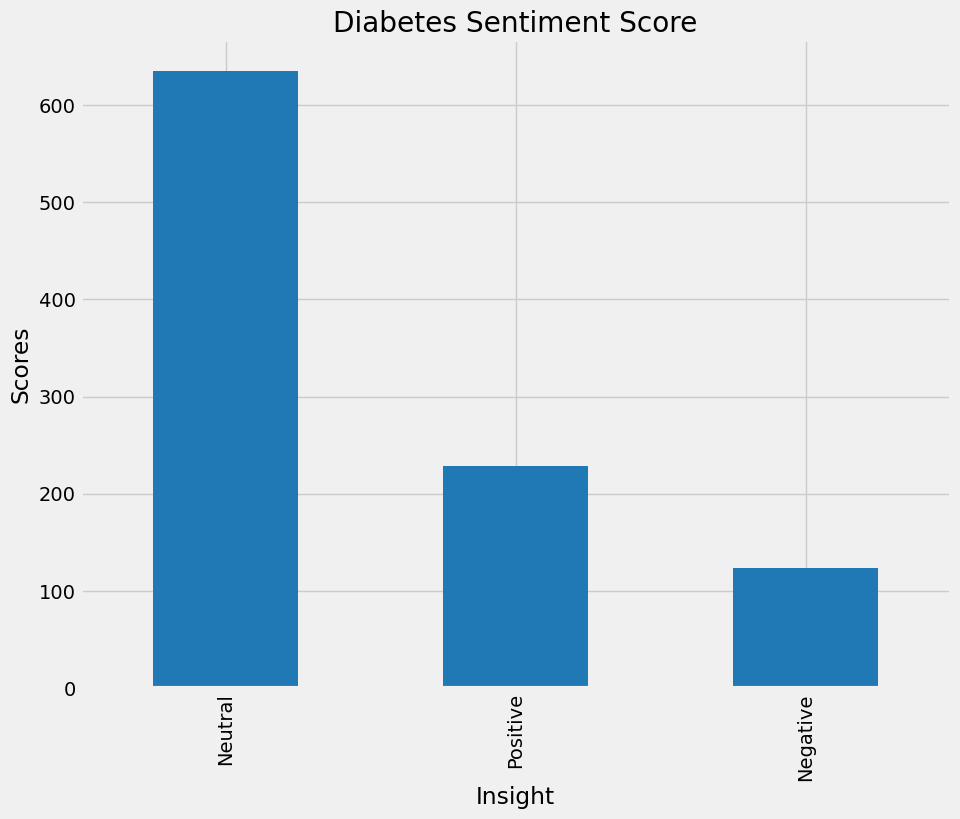

In [594]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Diabetes Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Exploring Sentiment Lexicon and Tokenizing of Dataset

In [596]:
# Install scikit-learn library
#!pip install scikit-learn
# Install NLTK library 
#!pip install nltk
import nltk
#nltk.download('opinion_lexicon')

# Import necessary modules from scikit-learn and NLTK libraries
from sklearn import preprocessing
import nltk

# Import the opinion lexicon corpus from NLTK
from nltk.corpus import opinion_lexicon
# Import the word_tokenize function from NLTK, which is used for tokenization
from nltk.tokenize import word_tokenize


# Print the total number of words in the opinion lexicon dataset
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
# Print examples of positive words from the opinion lexicon dataset
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
# Print examples of negative words from the opinion lexicon dataset
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


## Constructing Sentiment Scoring Dictionary of Dataset

In [598]:
# Let's create a dictionary which we can use for scoring our review titles

df.rename(columns={"reviewTitles": "Titles"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
    
#Printing a dictionary
print(word_dict)

{'a+': 1, 'abound': 1, 'abounds': 1, 'abundance': 1, 'abundant': 1, 'accessable': 1, 'accessible': 1, 'acclaim': 1, 'acclaimed': 1, 'acclamation': 1, 'accolade': 1, 'accolades': 1, 'accommodative': 1, 'accomodative': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'accomplishments': 1, 'accurate': 1, 'accurately': 1, 'achievable': 1, 'achievement': 1, 'achievements': 1, 'achievible': 1, 'acumen': 1, 'adaptable': 1, 'adaptive': 1, 'adequate': 1, 'adjustable': 1, 'admirable': 1, 'admirably': 1, 'admiration': 1, 'admire': 1, 'admirer': 1, 'admiring': 1, 'admiringly': 1, 'adorable': 1, 'adore': 1, 'adored': 1, 'adorer': 1, 'adoring': 1, 'adoringly': 1, 'adroit': 1, 'adroitly': 1, 'adulate': 1, 'adulation': 1, 'adulatory': 1, 'advanced': 1, 'advantage': 1, 'advantageous': 1, 'advantageously': 1, 'advantages': 1, 'adventuresome': 1, 'adventurous': 1, 'advocate': 1, 'advocated': 1, 'advocates': 1, 'affability': 1, 'affable': 1, 'affably': 1, 'affectation': 1, 'affection': 1, 'affe

## wordcloud theme in circle shape

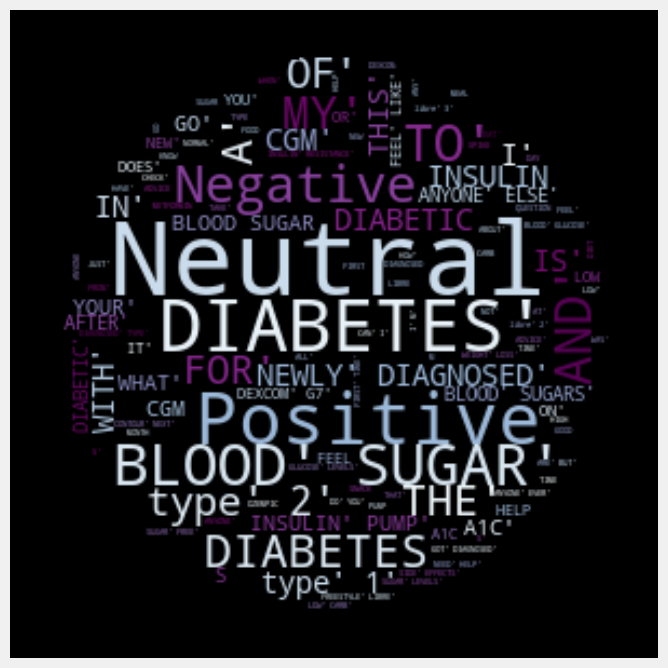

In [600]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate text values from all relevant columns
text = ' '.join(df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask and provided parameters
wc = WordCloud(
    background_color="black",
    mask=mask,
    contour_width=2,
    contour_color="black",
    colormap="BuPu_r",
    width=800,
    height=500
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear", origin='upper')

plt.show()

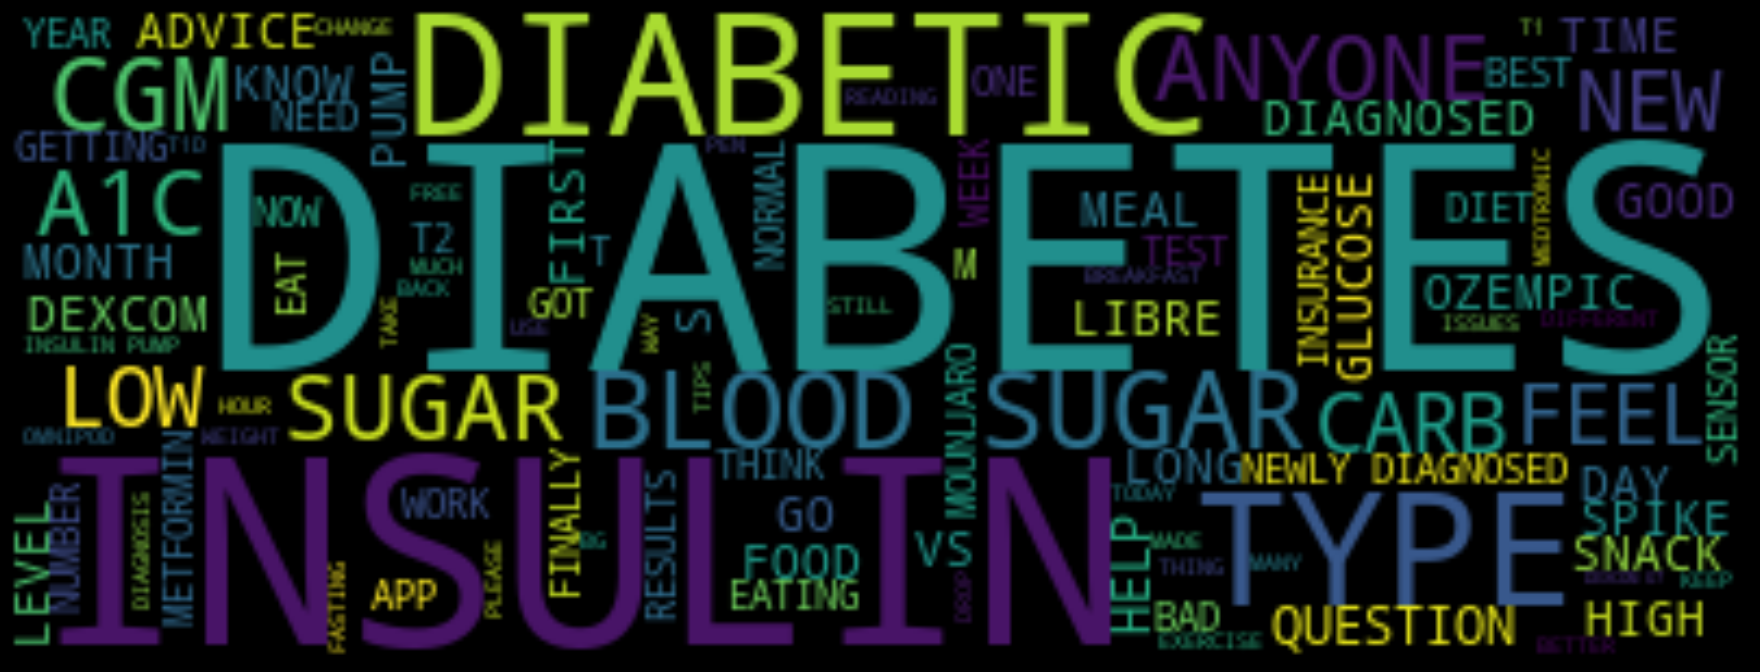

In [601]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=400, height = 150,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Email address

In [603]:
import re

# Define the email address to validate
email = "abhi@gmail.com"

# Use regular expression to match the email address pattern
if re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email):
    # If the email address matches the pattern, print "Valid email address"
    print("Valid email address")
else:
    # If the email address does not match the pattern, print "Invalid email address"
    print("Invalid email address")

Valid email address


## URL

In [605]:
import re

# Define the URL to validate
url = "https://www.nftdc.com"

# Use regular expression to match the URL pattern
if re.match(r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$', url):
    # If the URL matches the pattern, print "Valid URL"
    print("Valid URL")
else:
    # If the URL does not match the pattern, print "Invalid URL"
    print("Invalid URL")

Valid URL


## File path

In [607]:
import re

# Define the file path to validate
file_path = "/Users/shakkerar/Downloads/Iris.csv"

# Use regular expression to match the file path pattern
if re.match(r'^\/(?:[^\/\n]+\/)*[^\/\n]+\.[a-zA-Z0-9]+$', file_path):
    # If the file path matches the pattern, print "Valid file path"
    print("Valid file path")
else:
    # If the file path does not match the pattern, print "Invalid file path"
    print("Invalid file path")

Valid file path


## Phone Number

In [609]:
import re

# Define the phone number to validate
phone_number = "+1 (469) 279-3334"

# Use regular expression to match the phone number pattern
if re.match(r'^\+(?:[0-9] ?){6,14}[0-9]$', phone_number):
    # If the phone number matches the pattern, print "Valid phone number"
    print("Valid phone number")
else:
    # If the phone number does not match the pattern, print "Invalid phone number"
    print("Invalid phone number")

Invalid phone number


## Variable Name

In [611]:
import re

# Define the variable name to validate
name= "Robert"

# Use regular expression to match the variable name pattern
if re.match(r'^[a-zA-Z_][a-zA-Z0-9_]*$', name):
    # If the variable name matches the pattern, print "Valid variable name"
    print("Valid variable name")
else:
    # If the variable name does not match the pattern, print "Invalid variable name"
    print("Invalid variable name")

Valid variable name
